In [1]:
import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers

In [4]:
(x_train, y_train),(x_test,y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
y_train[2]

array([9], dtype=uint8)

In [6]:
print(x_train[8])

[[[134 186 223]
  [131 184 220]
  [128 182 218]
  ...
  [127 181 222]
  [127 181 222]
  [128 182 223]]

 [[133 189 228]
  [129 186 224]
  [128 186 224]
  ...
  [127 183 224]
  [127 183 224]
  [128 184 225]]

 [[128 185 226]
  [127 182 223]
  [128 182 223]
  ...
  [126 181 222]
  [126 181 222]
  [126 180 221]]

 ...

 [[174 208 235]
  [171 206 229]
  [155 189 216]
  ...
  [ 27  94 136]
  [ 29  96 137]
  [ 28  94 136]]

 [[194 221 244]
  [189 215 239]
  [159 196 225]
  ...
  [ 30  95 138]
  [ 30  96 139]
  [ 30  95 140]]

 [[193 217 237]
  [181 208 230]
  [168 201 227]
  ...
  [ 31  94 136]
  [ 32  94 137]
  [ 32  94 138]]]


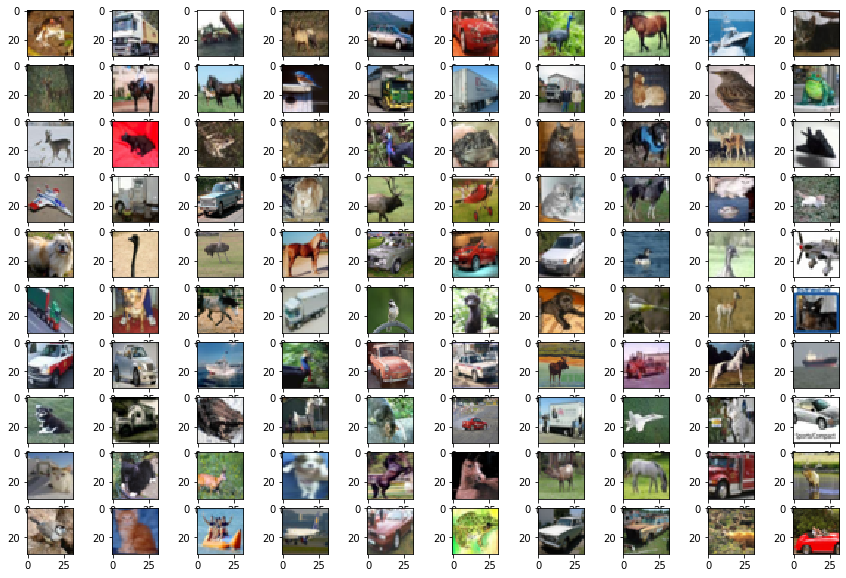

In [0]:
nrows=10
ncols=10
fig, subs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        iplt = subs[i, j]
        img_array = x_train[i*ncols + j]
        iplt.imshow(img_array)

In [0]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [0]:
x_train[8]

array([[[0.5254902 , 0.7294118 , 0.8745098 ],
        [0.5137255 , 0.72156864, 0.8627451 ],
        [0.5019608 , 0.7137255 , 0.85490197],
        ...,
        [0.49803922, 0.70980394, 0.87058824],
        [0.49803922, 0.70980394, 0.87058824],
        [0.5019608 , 0.7137255 , 0.8745098 ]],

       [[0.52156866, 0.7411765 , 0.89411765],
        [0.5058824 , 0.7294118 , 0.8784314 ],
        [0.5019608 , 0.7294118 , 0.8784314 ],
        ...,
        [0.49803922, 0.7176471 , 0.8784314 ],
        [0.49803922, 0.7176471 , 0.8784314 ],
        [0.5019608 , 0.72156864, 0.88235295]],

       [[0.5019608 , 0.7254902 , 0.8862745 ],
        [0.49803922, 0.7137255 , 0.8745098 ],
        [0.5019608 , 0.7137255 , 0.8745098 ],
        ...,
        [0.49411765, 0.70980394, 0.87058824],
        [0.49411765, 0.70980394, 0.87058824],
        [0.49411765, 0.7058824 , 0.8666667 ]],

       ...,

       [[0.68235296, 0.8156863 , 0.92156863],
        [0.67058825, 0.80784315, 0.8980392 ],
        [0.60784316, 0

In [0]:
from keras.utils import to_categorical
y_train=y_train.flatten()
y_train=to_categorical(y_train)

y_test=y_test.flatten()
y_test=to_categorical(y_test)

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Using VGG16 as Pretrained model with Imagenet Weights.**

In [0]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32,32, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()





58892288/58889256 [==============================] - 4s 0us/step






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 14,982,474
Non-trainable params: 0
_________________________________________________________________


**Freezing the conv base layers**

In [0]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable=False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop= EarlyStopping(monitor='loss', mode='min', verbose=1)
model_check = ModelCheckpoint('my_best_model.h5', monitor='acc', mode='max', verbose=1, save_best_only=True)

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
vgg_model=model.fit(x_train, y_train, batch_size=100, epochs=1,callbacks=[early_stop,model_check]) 

Epoch 1/1
50000/50000 [==============================] - 344s 7ms/step - loss: 0.2991 - acc: 0.9000

Epoch 00001: acc improved from -inf to 0.90002, saving model to my_best_model.h5


In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 74s 7ms/step


**Test Accuracy**

In [0]:
print(test_acc*100)

90.01299766540527


In [0]:
model.save('cifar_model.h5')

In [0]:
from keras.models import load_model
import cv2
import numpy as np

In [0]:
my_model = load_model("cifar_model.h5")

In [0]:
img=y_train[8]

In [0]:
print(img)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:
img=x_train[8]

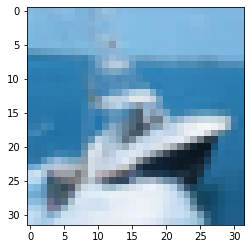

In [0]:
plt.imshow(img)

In [0]:
img = cv2.resize(img,(32,32))
img = np.reshape(img,[1,32,32,3])

In [0]:
classes = model.predict(img)

In [0]:
print(classes)

[[0.1936805  0.12458928 0.07684641 0.08843742 0.07465301 0.07034598
  0.04924023 0.07393432 0.17152323 0.07674962]]


In [0]:
print("Class Label: ", np.argmax(classes,axis=1))

Class Label:  [0]
